# Semana 1 del curso intensivo de Cosmología  - CMB

Del 25 de marzo al 4 de abril de 2025 - DF-FCFyN-UBA

Prof. Claudia Scóccola
Departamento de Física, Facultad de Ciencias Físicas y Matemáticas, Universidad de Chile

---

## Práctica 1

---

#### Ejercicio 0

Explorar superficialmente los tutoriales CAMBdemo.ipynb y tutorial_healpy.ipynb, que están en las carpetas CAMB/ y healpy/ del directorio CMB/ donde se aloja esta práctica 1.

Tenga como referencia estos tutoriales para realizar los ejercicios de la práctica.

#### Ejercicio 1

Explorar el tutorial CAMBdemo.ipynb para aprender cómo se utiliza el código para calcular los $C_ \ell$ y cómo se generan mapas a partir de estos espectros.

In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
import healpy as hp
from camb import model, initialpower

#### Ejercicio 2.1:

Elegir un conjunto de parámetros cosmológicos, y graficar los $C_\ell^{TT}$, $C_\ell^{EE}$, $C_\ell^{BB}$, $C_\ell^{TE}$.

Notar que la salida de CAMB en realidad son los $D_\ell = \frac{\ell (\ell + 1)}{2 \pi} C_\ell$

In [2]:
#Definimos los parametros cosmologicos
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

#Calculo los resultados
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

In [3]:
ells = np.arange(3051)  # l=0 a l=3051
Dl_TT = powers["total"][:, 0]  # TT
Dl_EE = powers["total"][:, 1]  # EE
Dl_BB = powers["total"][:, 2]  # BB
Dl_TE = powers["total"][:, 3]  # TE

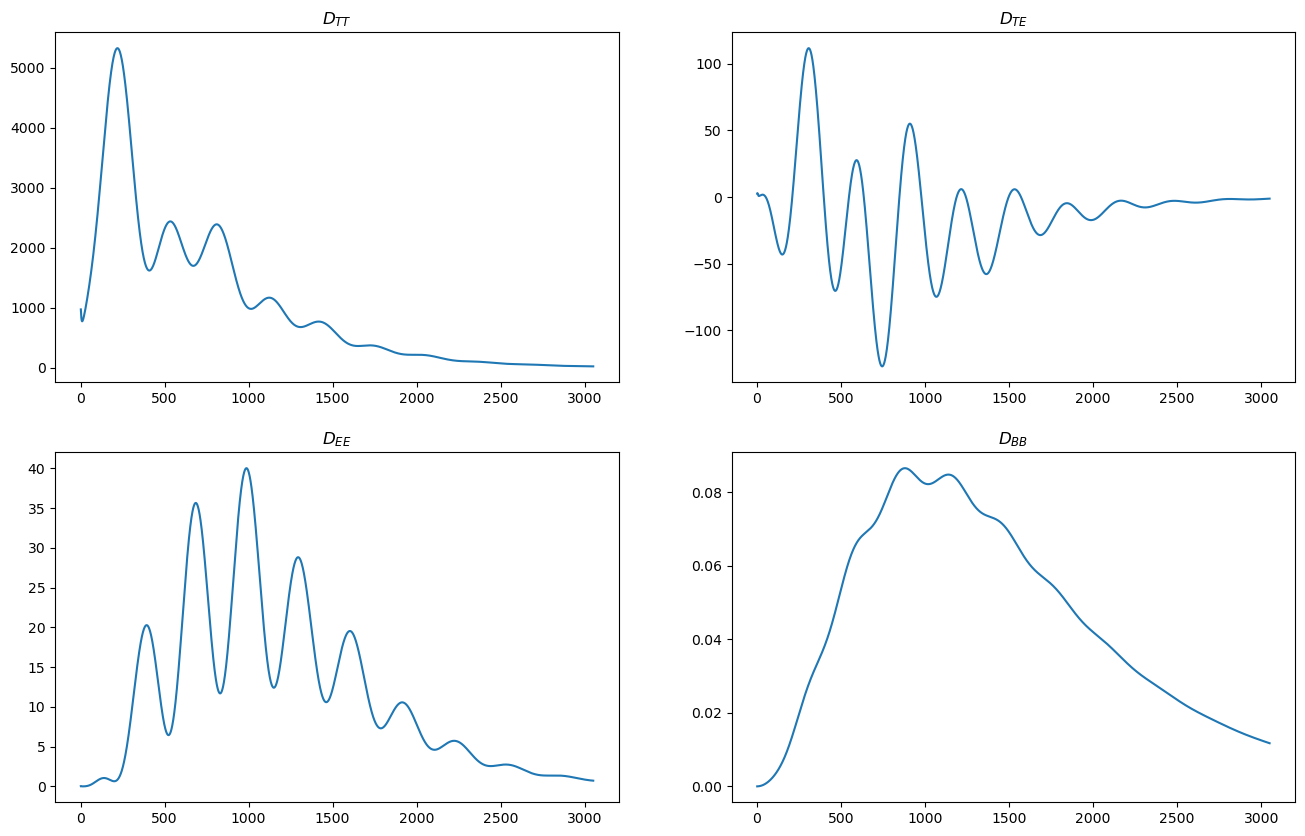

In [4]:
#Grafico los D_l
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(ells[2:], Dl_TT[2:])
plt.title(r'$D_{TT}$')

plt.subplot(2,2,2)
plt.plot(ells[2:], Dl_TE[2:])
plt.title(r'$D_{TE}$')

plt.subplot(2,2,3)
plt.plot(ells[2:], Dl_EE[2:])
plt.title(r'$D_{EE}$')

plt.subplot(2,2,4)
plt.plot(ells[2:], Dl_BB[2:])
plt.title(r'$D_{BB}$');

In [5]:
#Calculo los C_l
cl_TT = np.zeros(len(ells))
cl_EE = np.zeros(len(ells))
cl_BB = np.zeros(len(ells))
cl_TE = np.zeros(len(ells))

for i in range(1, len(ells)):
    cl_TT[i] = Dl_TT[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_EE[i] = Dl_EE[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_BB[i] = Dl_BB[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_TE[i] = Dl_TE[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))

cls = [cl_TT, cl_EE, cl_BB, cl_TE]

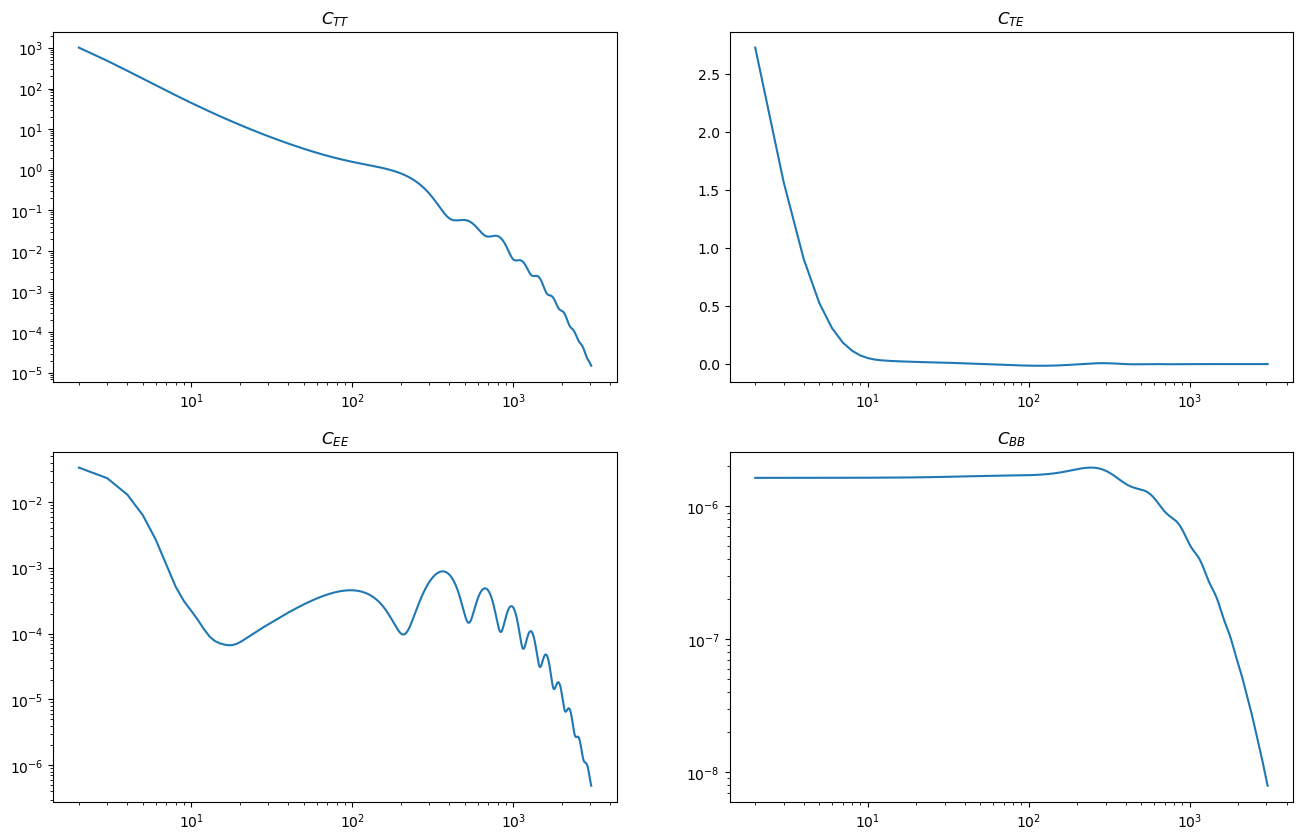

In [6]:
#Grafico los C_l
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(ells[2:], cl_TT[2:])
plt.title(r'$C_{TT}$')
plt.xscale('log'); plt.yscale('log')

plt.subplot(2,2,2)
plt.plot(ells[2:], cl_TE[2:])
plt.title(r'$C_{TE}$')
plt.xscale('log'); #plt.yscale('log')

plt.subplot(2,2,3)
plt.plot(ells[2:], cl_EE[2:])
plt.title(r'$C_{EE}$')
plt.xscale('log'); plt.yscale('log')

plt.subplot(2,2,4)
plt.plot(ells[2:], cl_BB[2:])
plt.title(r'$C_{BB}$')
plt.xscale('log'); plt.yscale('log');

#### Ejercicio 2.2:

Variar los parámetros cosmológicos (de a uno por vez) en un 5% respecto del valor fiducial elegido en el ejercicio 2.1, y volver a graficar los espectros.
Varíe $H_0$, $\Omega_b$, $\Omega_c$, $A_s$, $n_s$.
Cómo se modifica el aspecto de las curvas? Puede entender, al menos intuitivamente por qué se produce dicho cambio?

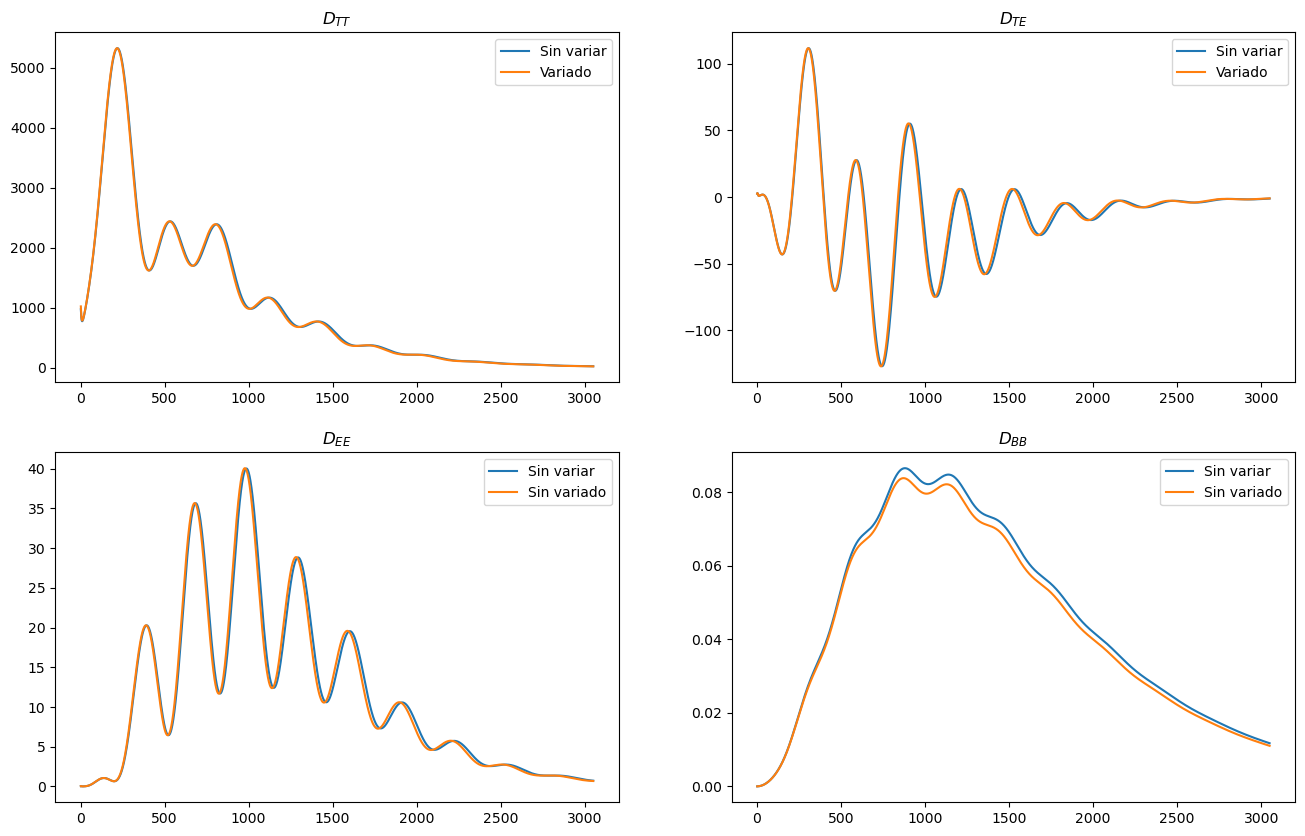

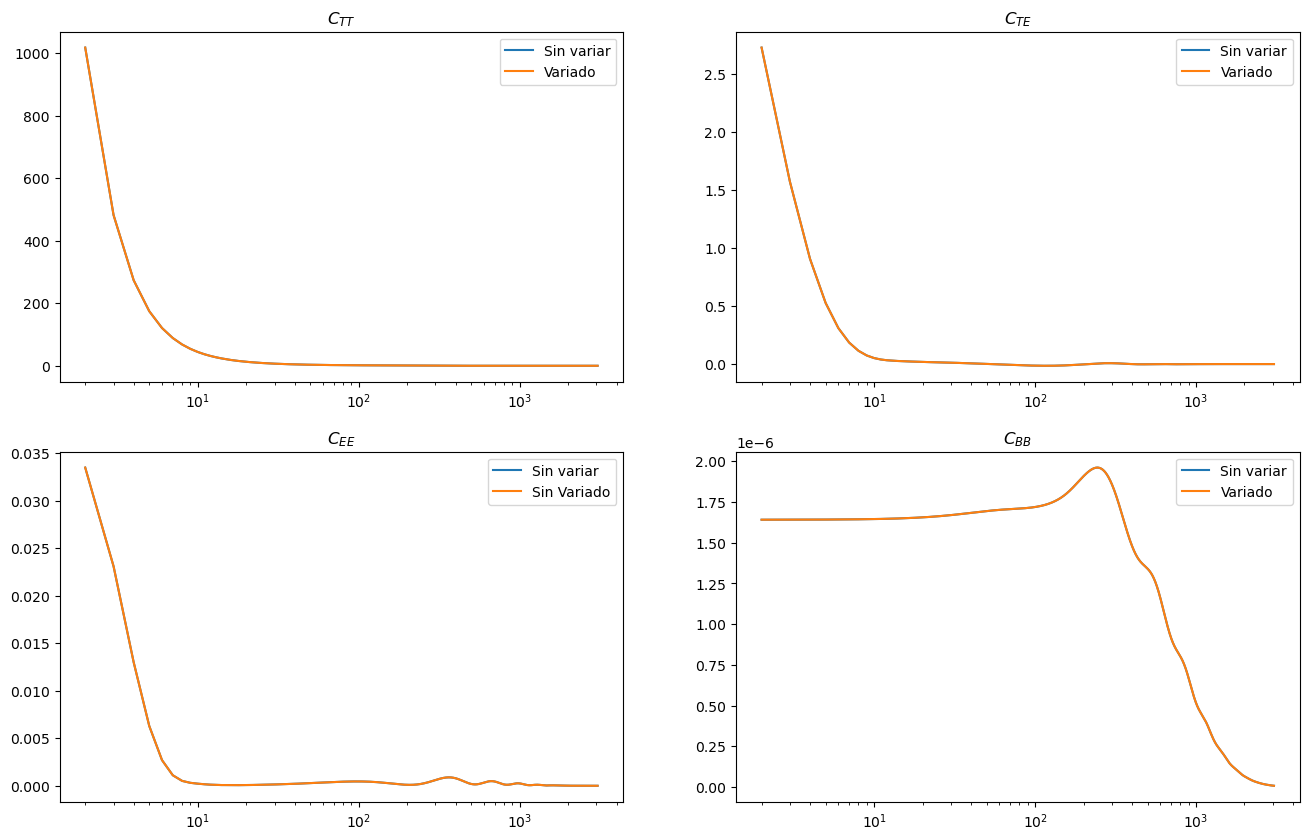

In [7]:
#Primero variemos H_0
pars = camb.set_params(H0=67.5*1.05, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

ells = np.arange(3051)
Dl_TT2 = powers["total"][:, 0]  # TT
Dl_EE2 = powers["total"][:, 1]  # EE
Dl_BB2 = powers["total"][:, 2]  # BB
Dl_TE2 = powers["total"][:, 3]  # TE

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(ells[2:], Dl_TT[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_TT2[2:], label = 'Variado')
plt.legend()
plt.title(r'$D_{TT}$')

plt.subplot(2,2,2)
plt.plot(ells[2:], Dl_TE[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_TE2[2:], label = 'Variado')
plt.legend()
plt.title(r'$D_{TE}$')

plt.subplot(2,2,3)
plt.plot(ells[2:], Dl_EE[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_EE2[2:], label = 'Sin variado')
plt.legend()
plt.title(r'$D_{EE}$')

plt.subplot(2,2,4)
plt.plot(ells[2:], Dl_BB[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_BB2[2:], label = 'Sin variado')
plt.legend()
plt.title(r'$D_{BB}$');

################################################################################

cl_TT2 = np.zeros(len(ells))
cl_EE2 = np.zeros(len(ells))
cl_BB2 = np.zeros(len(ells))
cl_TE2 = np.zeros(len(ells))

for i in range(1, len(ells)):
    cl_TT2[i] = Dl_TT[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_EE2[i] = Dl_EE[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_BB2[i] = Dl_BB[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_TE2[i] = Dl_TE[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))

cls = [cl_TT, cl_EE, cl_BB, cl_TE]

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(ells[2:], cl_TT[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_TT2[2:], label = 'Variado')
plt.title(r'$C_{TT}$')
plt.legend()
plt.xscale('log');

plt.subplot(2,2,2)
plt.plot(ells[2:], cl_TE[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_TE2[2:], label = 'Variado')
plt.title(r'$C_{TE}$')
plt.legend()
plt.xscale('log');

plt.subplot(2,2,3)
plt.plot(ells[2:], cl_EE[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_EE2[2:], label = 'Sin Variado')
plt.title(r'$C_{EE}$')
plt.legend()
plt.xscale('log');

plt.subplot(2,2,4)
plt.plot(ells[2:], cl_BB[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_BB2[2:], label = 'Variado')
plt.title(r'$C_{BB}$')
plt.legend()
plt.xscale('log');

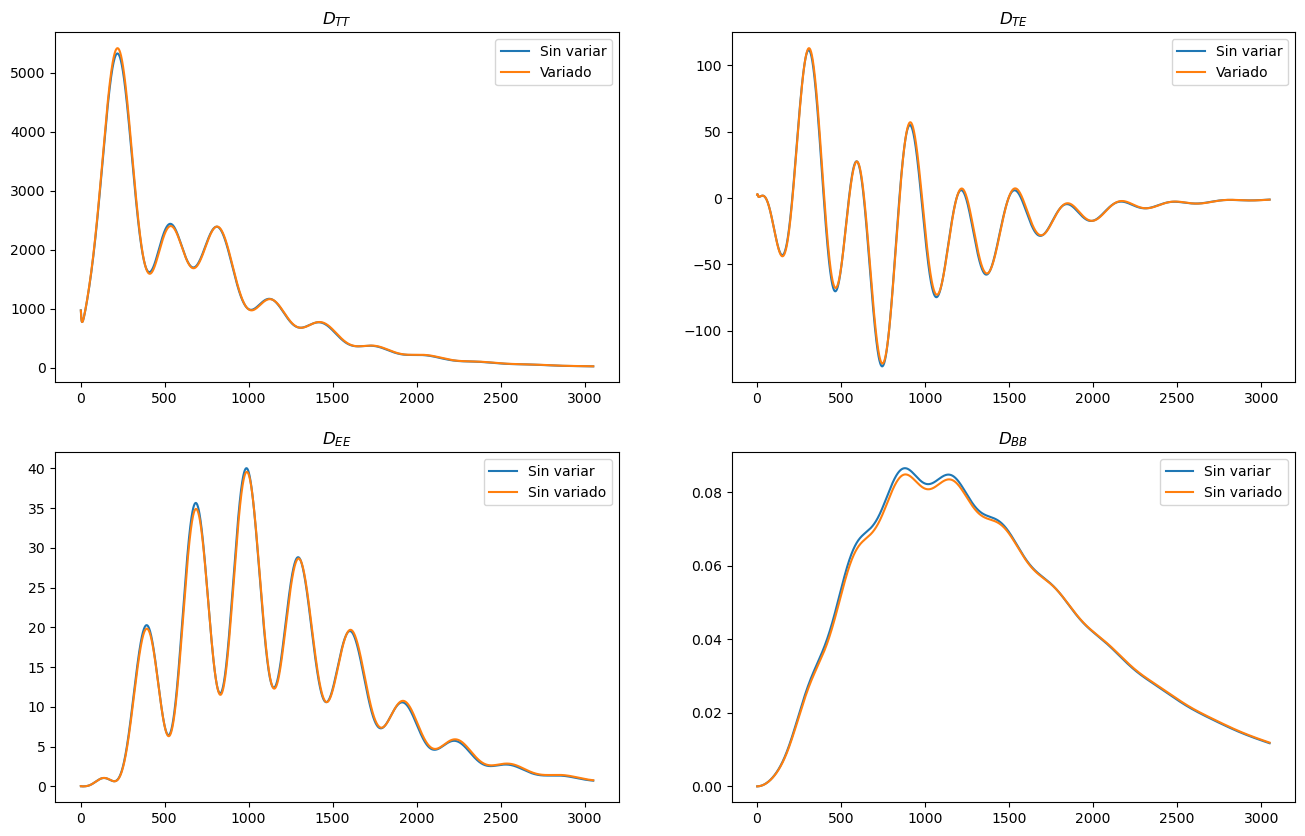

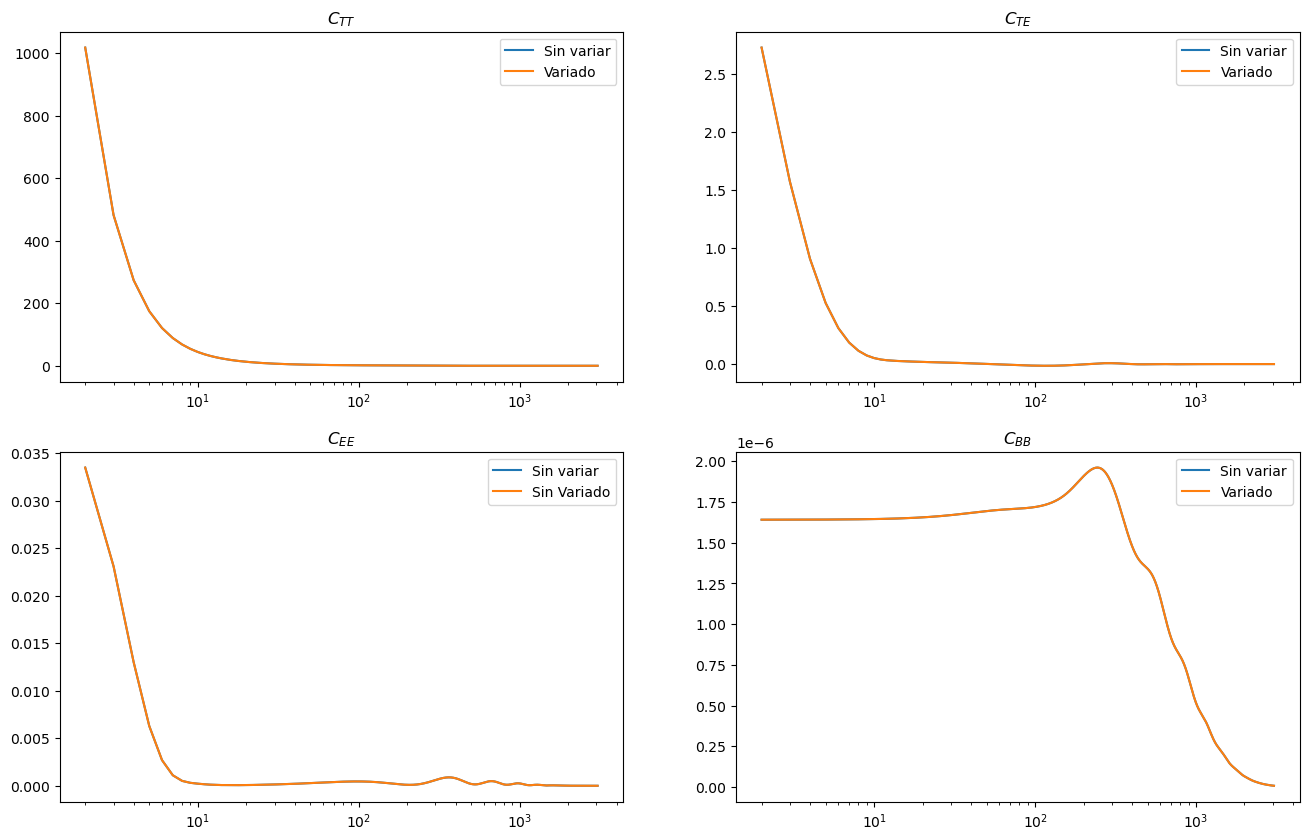

In [8]:
#Variemos Omega_b
pars = camb.set_params(H0=67.5, ombh2=0.022*1.05, omch2=0.122, mnu=0.06, omk=0, tau=0.06, As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

ells = np.arange(3051)
Dl_TT2 = powers["total"][:, 0]  # TT
Dl_EE2 = powers["total"][:, 1]  # EE
Dl_BB2 = powers["total"][:, 2]  # BB
Dl_TE2 = powers["total"][:, 3]  # TE

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(ells[2:], Dl_TT[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_TT2[2:], label = 'Variado')
plt.legend()
plt.title(r'$D_{TT}$')

plt.subplot(2,2,2)
plt.plot(ells[2:], Dl_TE[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_TE2[2:], label = 'Variado')
plt.legend()
plt.title(r'$D_{TE}$')

plt.subplot(2,2,3)
plt.plot(ells[2:], Dl_EE[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_EE2[2:], label = 'Sin variado')
plt.legend()
plt.title(r'$D_{EE}$')

plt.subplot(2,2,4)
plt.plot(ells[2:], Dl_BB[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_BB2[2:], label = 'Sin variado')
plt.legend()
plt.title(r'$D_{BB}$');

################################################################################

cl_TT2 = np.zeros(len(ells))
cl_EE2 = np.zeros(len(ells))
cl_BB2 = np.zeros(len(ells))
cl_TE2 = np.zeros(len(ells))

for i in range(1, len(ells)):
    cl_TT2[i] = Dl_TT[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_EE2[i] = Dl_EE[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_BB2[i] = Dl_BB[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_TE2[i] = Dl_TE[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))

cls = [cl_TT, cl_EE, cl_BB, cl_TE]

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(ells[2:], cl_TT[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_TT2[2:], label = 'Variado')
plt.title(r'$C_{TT}$')
plt.legend()
plt.xscale('log');

plt.subplot(2,2,2)
plt.plot(ells[2:], cl_TE[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_TE2[2:], label = 'Variado')
plt.title(r'$C_{TE}$')
plt.legend()
plt.xscale('log');

plt.subplot(2,2,3)
plt.plot(ells[2:], cl_EE[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_EE2[2:], label = 'Sin Variado')
plt.title(r'$C_{EE}$')
plt.legend()
plt.xscale('log');

plt.subplot(2,2,4)
plt.plot(ells[2:], cl_BB[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_BB2[2:], label = 'Variado')
plt.title(r'$C_{BB}$')
plt.legend()
plt.xscale('log');

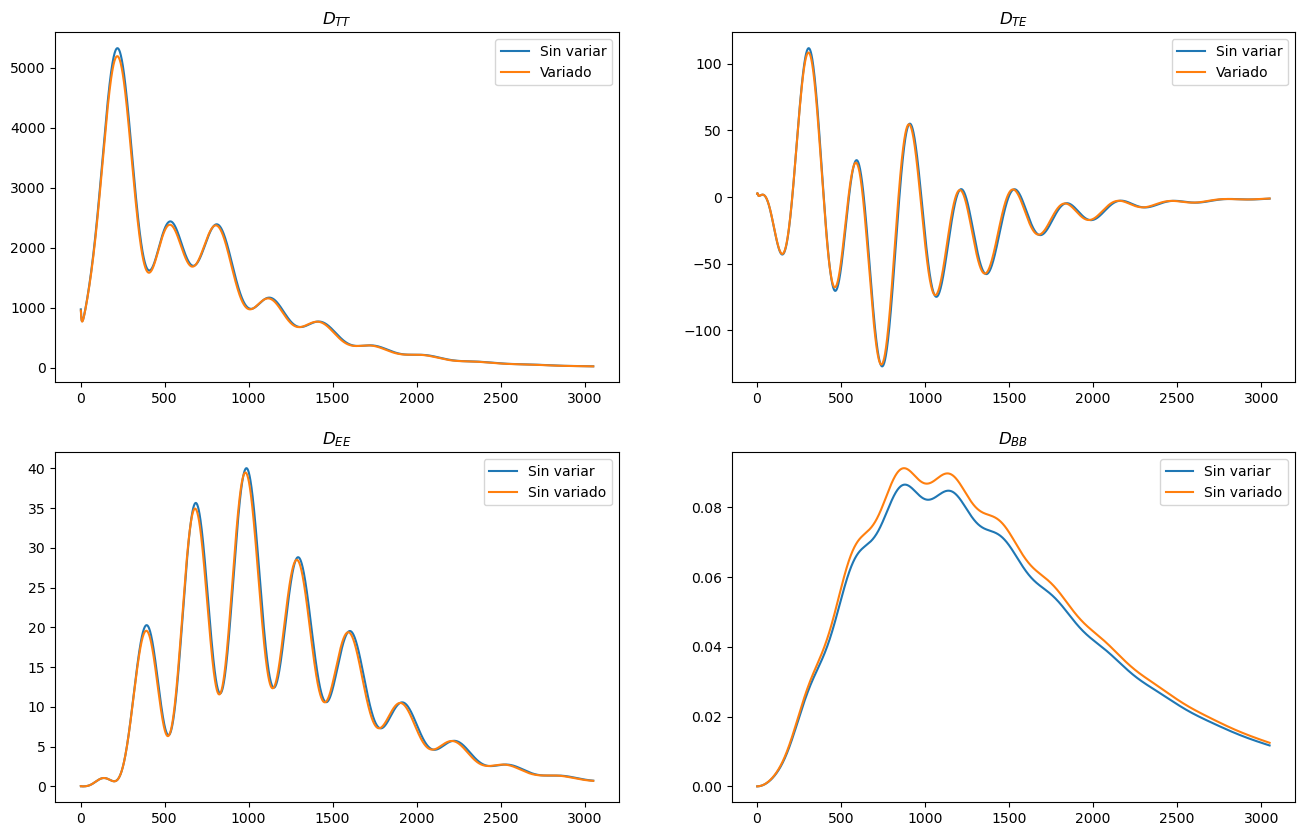

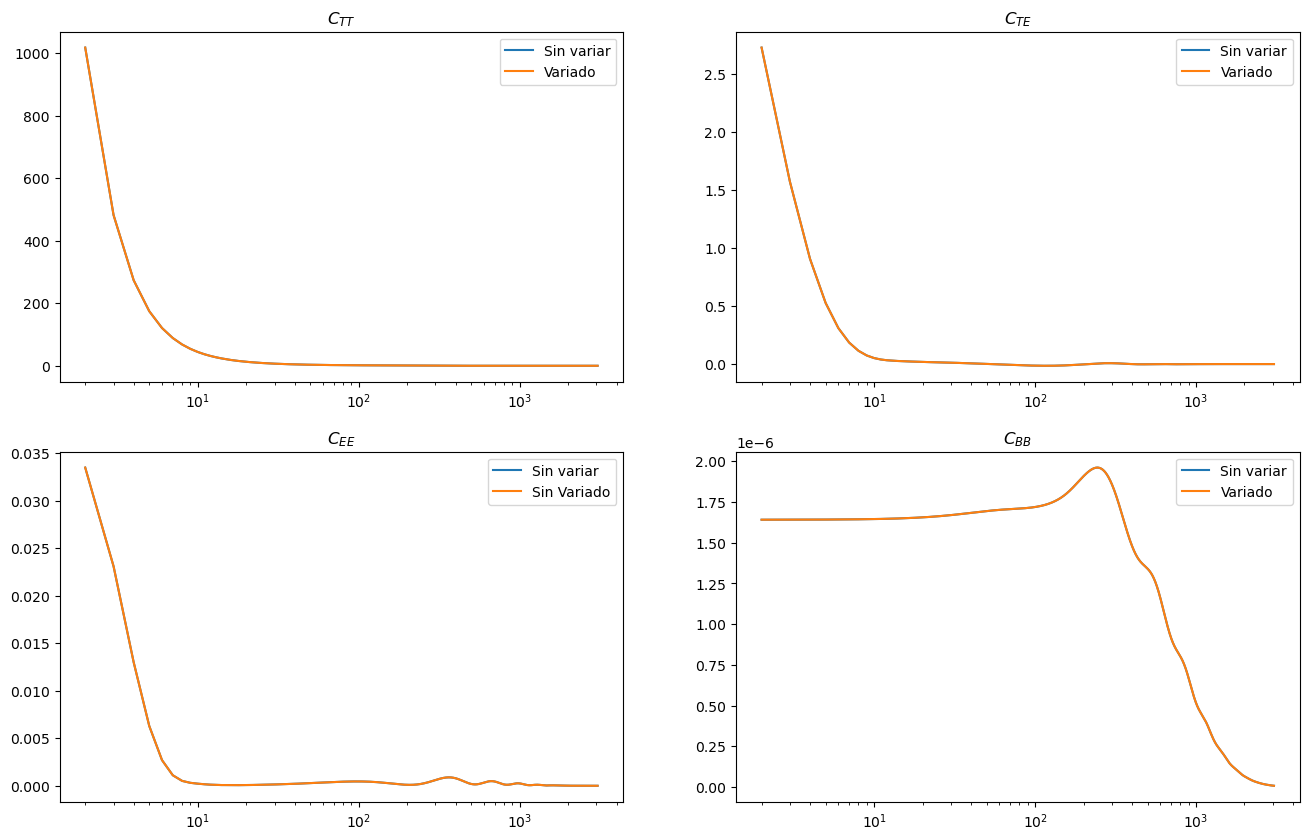

In [9]:
#Variemos Omega_c
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122*1.05, mnu=0.06, omk=0, tau=0.06, As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

ells = np.arange(3051)
Dl_TT2 = powers["total"][:, 0]  # TT
Dl_EE2 = powers["total"][:, 1]  # EE
Dl_BB2 = powers["total"][:, 2]  # BB
Dl_TE2 = powers["total"][:, 3]  # TE

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(ells[2:], Dl_TT[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_TT2[2:], label = 'Variado')
plt.legend()
plt.title(r'$D_{TT}$')

plt.subplot(2,2,2)
plt.plot(ells[2:], Dl_TE[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_TE2[2:], label = 'Variado')
plt.legend()
plt.title(r'$D_{TE}$')

plt.subplot(2,2,3)
plt.plot(ells[2:], Dl_EE[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_EE2[2:], label = 'Sin variado')
plt.legend()
plt.title(r'$D_{EE}$')

plt.subplot(2,2,4)
plt.plot(ells[2:], Dl_BB[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_BB2[2:], label = 'Sin variado')
plt.legend()
plt.title(r'$D_{BB}$');

################################################################################

cl_TT2 = np.zeros(len(ells))
cl_EE2 = np.zeros(len(ells))
cl_BB2 = np.zeros(len(ells))
cl_TE2 = np.zeros(len(ells))

for i in range(1, len(ells)):
    cl_TT2[i] = Dl_TT[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_EE2[i] = Dl_EE[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_BB2[i] = Dl_BB[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_TE2[i] = Dl_TE[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))

cls = [cl_TT, cl_EE, cl_BB, cl_TE]

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(ells[2:], cl_TT[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_TT2[2:], label = 'Variado')
plt.title(r'$C_{TT}$')
plt.legend()
plt.xscale('log');

plt.subplot(2,2,2)
plt.plot(ells[2:], cl_TE[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_TE2[2:], label = 'Variado')
plt.title(r'$C_{TE}$')
plt.legend()
plt.xscale('log');

plt.subplot(2,2,3)
plt.plot(ells[2:], cl_EE[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_EE2[2:], label = 'Sin Variado')
plt.title(r'$C_{EE}$')
plt.legend()
plt.xscale('log');

plt.subplot(2,2,4)
plt.plot(ells[2:], cl_BB[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_BB2[2:], label = 'Variado')
plt.title(r'$C_{BB}$')
plt.legend()
plt.xscale('log');

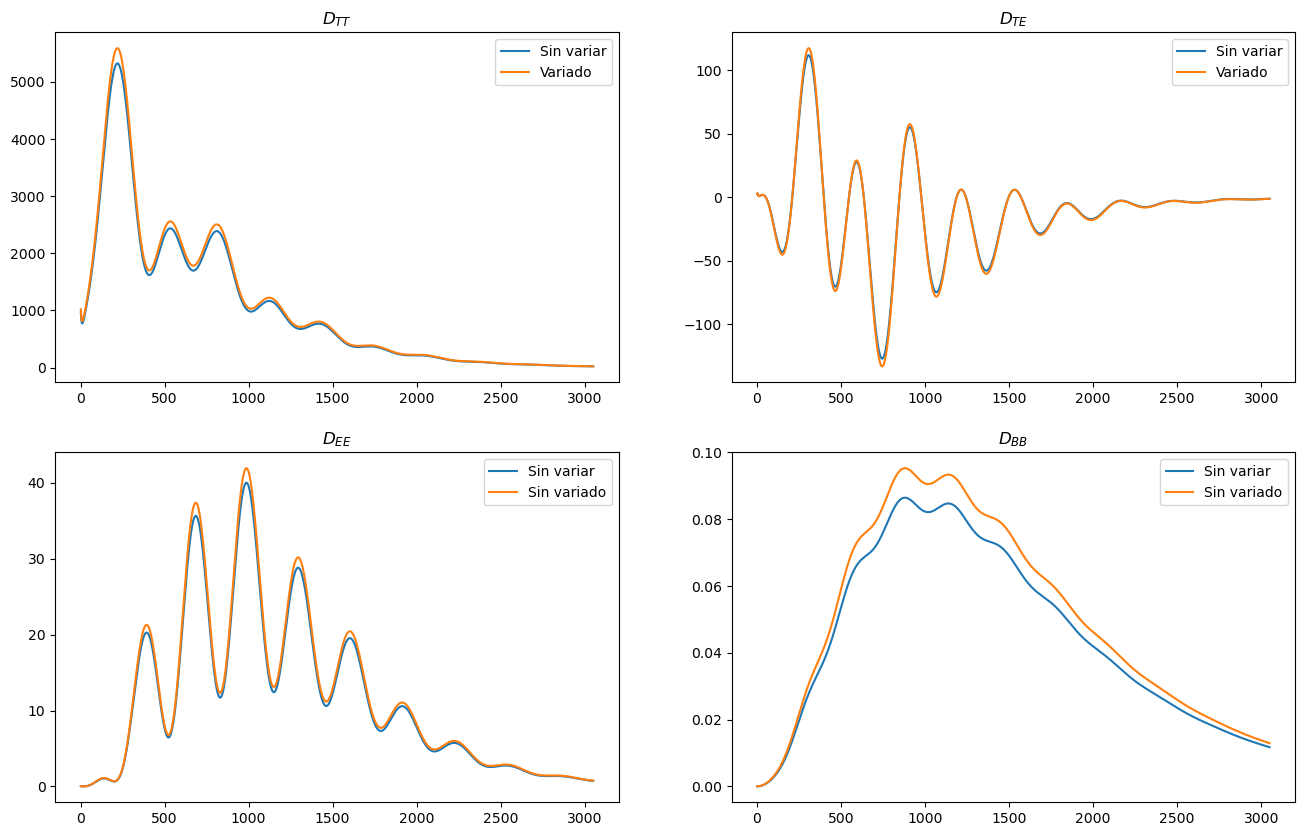

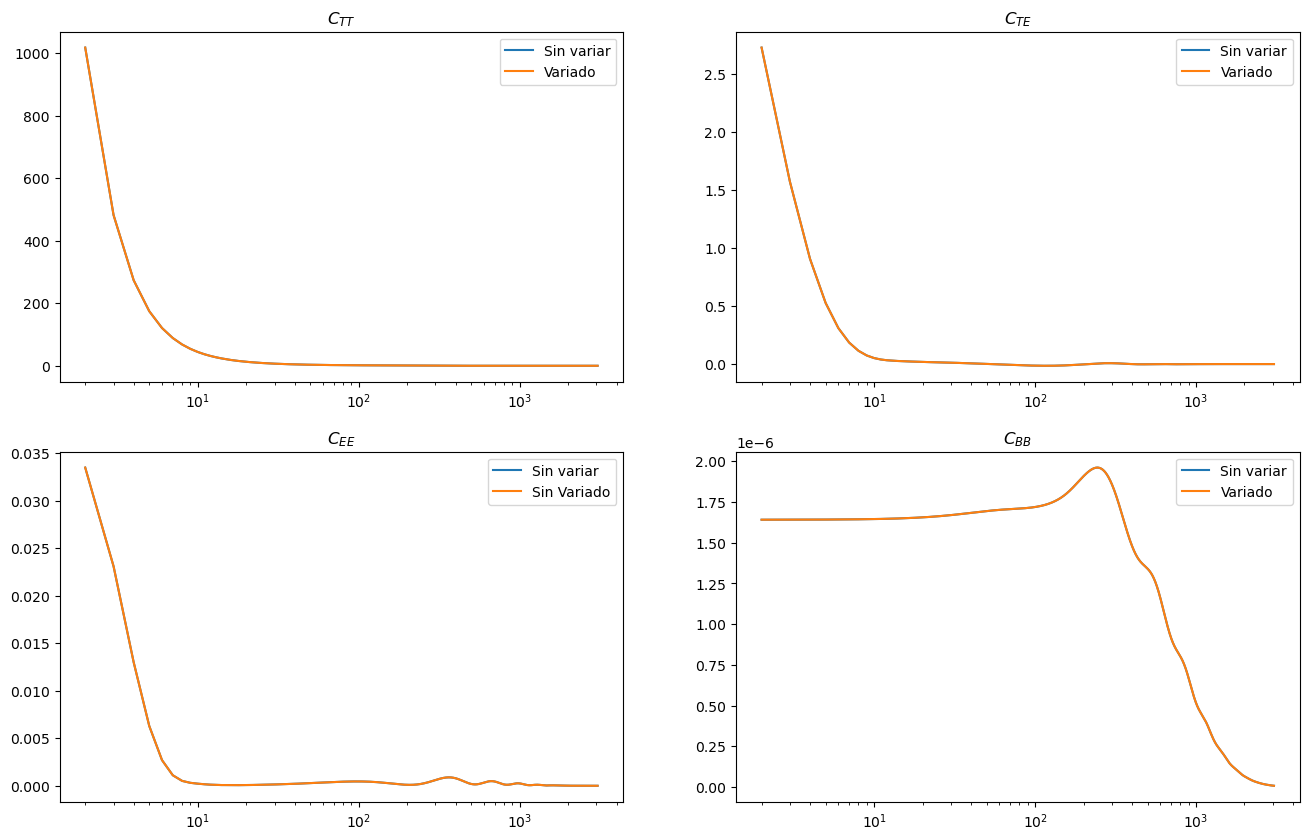

In [10]:
#Variemos A_s
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, As=2e-9*1.05, ns=0.965, halofit_version='mead', lmax=3000)

results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

ells = np.arange(3051)
Dl_TT2 = powers["total"][:, 0]  # TT
Dl_EE2 = powers["total"][:, 1]  # EE
Dl_BB2 = powers["total"][:, 2]  # BB
Dl_TE2 = powers["total"][:, 3]  # TE

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(ells[2:], Dl_TT[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_TT2[2:], label = 'Variado')
plt.legend()
plt.title(r'$D_{TT}$')

plt.subplot(2,2,2)
plt.plot(ells[2:], Dl_TE[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_TE2[2:], label = 'Variado')
plt.legend()
plt.title(r'$D_{TE}$')

plt.subplot(2,2,3)
plt.plot(ells[2:], Dl_EE[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_EE2[2:], label = 'Sin variado')
plt.legend()
plt.title(r'$D_{EE}$')

plt.subplot(2,2,4)
plt.plot(ells[2:], Dl_BB[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_BB2[2:], label = 'Sin variado')
plt.legend()
plt.title(r'$D_{BB}$');

################################################################################

cl_TT2 = np.zeros(len(ells))
cl_EE2 = np.zeros(len(ells))
cl_BB2 = np.zeros(len(ells))
cl_TE2 = np.zeros(len(ells))

for i in range(1, len(ells)):
    cl_TT2[i] = Dl_TT[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_EE2[i] = Dl_EE[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_BB2[i] = Dl_BB[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_TE2[i] = Dl_TE[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))

cls = [cl_TT, cl_EE, cl_BB, cl_TE]

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(ells[2:], cl_TT[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_TT2[2:], label = 'Variado')
plt.title(r'$C_{TT}$')
plt.legend()
plt.xscale('log');

plt.subplot(2,2,2)
plt.plot(ells[2:], cl_TE[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_TE2[2:], label = 'Variado')
plt.title(r'$C_{TE}$')
plt.legend()
plt.xscale('log');

plt.subplot(2,2,3)
plt.plot(ells[2:], cl_EE[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_EE2[2:], label = 'Sin Variado')
plt.title(r'$C_{EE}$')
plt.legend()
plt.xscale('log');

plt.subplot(2,2,4)
plt.plot(ells[2:], cl_BB[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_BB2[2:], label = 'Variado')
plt.title(r'$C_{BB}$')
plt.legend()
plt.xscale('log');

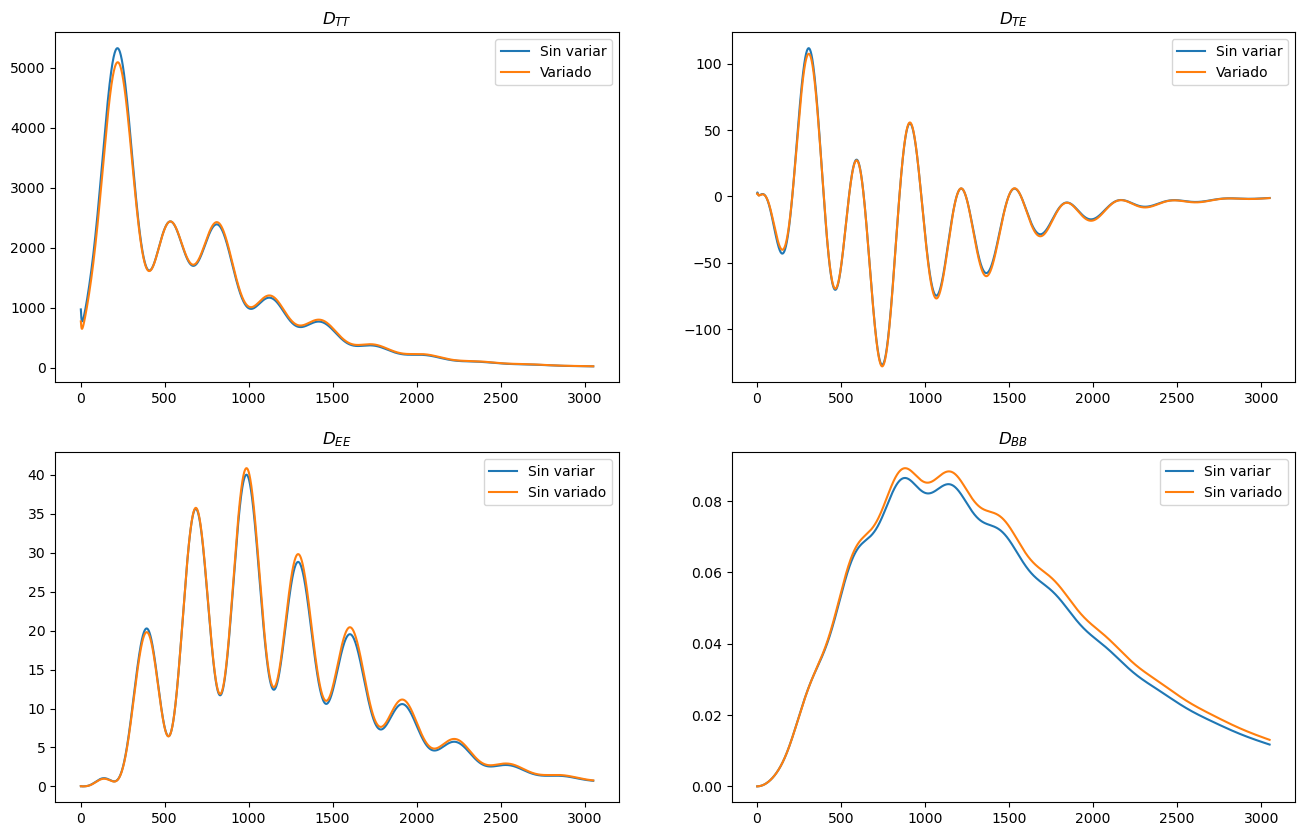

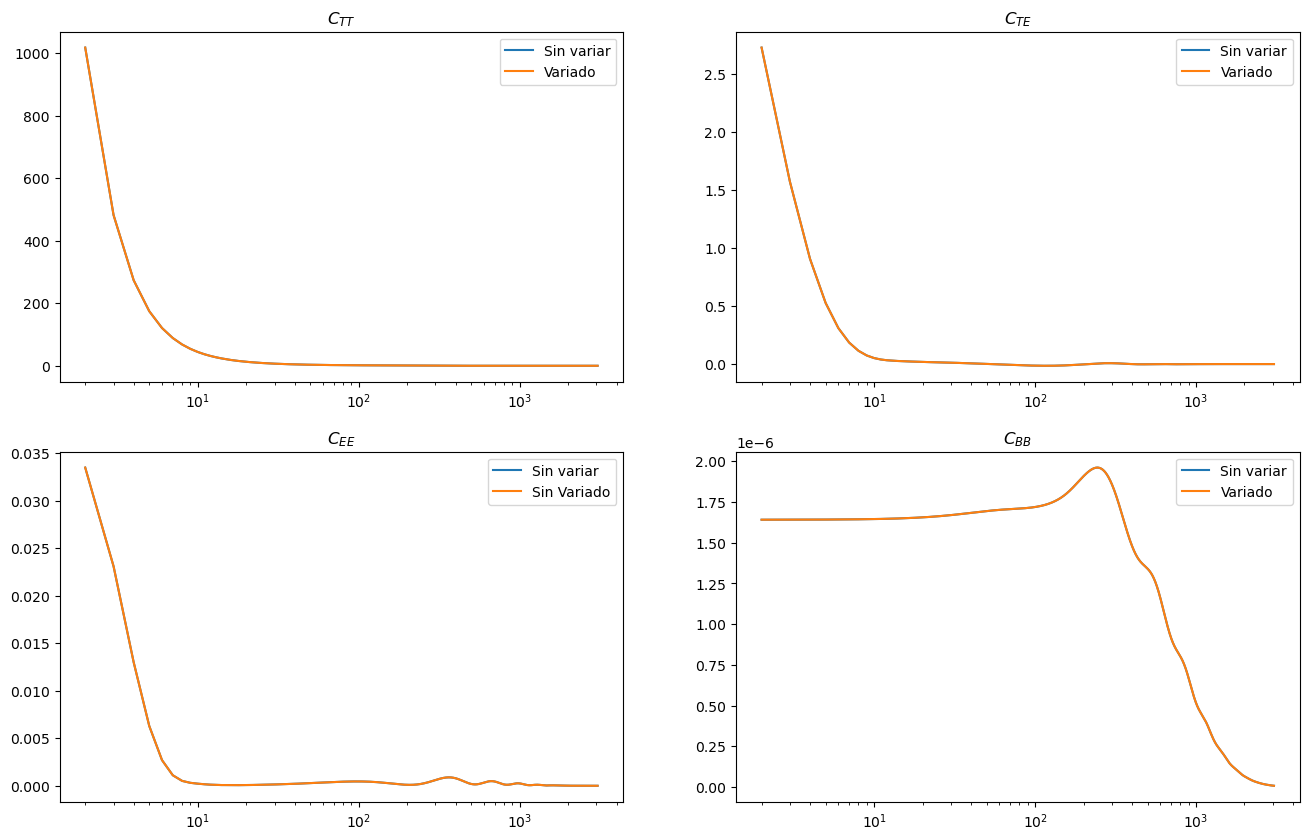

In [11]:
#Finalmente variemos n_s
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, As=2e-9, ns=0.965*1.05, halofit_version='mead', lmax=3000)

results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

ells = np.arange(3051)
Dl_TT2 = powers["total"][:, 0]  # TT
Dl_EE2 = powers["total"][:, 1]  # EE
Dl_BB2 = powers["total"][:, 2]  # BB
Dl_TE2 = powers["total"][:, 3]  # TE

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(ells[2:], Dl_TT[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_TT2[2:], label = 'Variado')
plt.legend()
plt.title(r'$D_{TT}$')

plt.subplot(2,2,2)
plt.plot(ells[2:], Dl_TE[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_TE2[2:], label = 'Variado')
plt.legend()
plt.title(r'$D_{TE}$')

plt.subplot(2,2,3)
plt.plot(ells[2:], Dl_EE[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_EE2[2:], label = 'Sin variado')
plt.legend()
plt.title(r'$D_{EE}$')

plt.subplot(2,2,4)
plt.plot(ells[2:], Dl_BB[2:], label = 'Sin variar')
plt.plot(ells[2:], Dl_BB2[2:], label = 'Sin variado')
plt.legend()
plt.title(r'$D_{BB}$');

################################################################################

cl_TT2 = np.zeros(len(ells))
cl_EE2 = np.zeros(len(ells))
cl_BB2 = np.zeros(len(ells))
cl_TE2 = np.zeros(len(ells))

for i in range(1, len(ells)):
    cl_TT2[i] = Dl_TT[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_EE2[i] = Dl_EE[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_BB2[i] = Dl_BB[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_TE2[i] = Dl_TE[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))

cls = [cl_TT, cl_EE, cl_BB, cl_TE]

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(ells[2:], cl_TT[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_TT2[2:], label = 'Variado')
plt.title(r'$C_{TT}$')
plt.legend()
plt.xscale('log');

plt.subplot(2,2,2)
plt.plot(ells[2:], cl_TE[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_TE2[2:], label = 'Variado')
plt.title(r'$C_{TE}$')
plt.legend()
plt.xscale('log');

plt.subplot(2,2,3)
plt.plot(ells[2:], cl_EE[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_EE2[2:], label = 'Sin Variado')
plt.title(r'$C_{EE}$')
plt.legend()
plt.xscale('log');

plt.subplot(2,2,4)
plt.plot(ells[2:], cl_BB[2:], label = 'Sin variar')
plt.plot(ells[2:], cl_BB2[2:], label = 'Variado')
plt.title(r'$C_{BB}$')
plt.legend()
plt.xscale('log');

#### Ejercicio 3.a:

Utilizando CAMB, crear una realización de mapas de CMB. Guarde el "seed" para poder reproducir la realización.


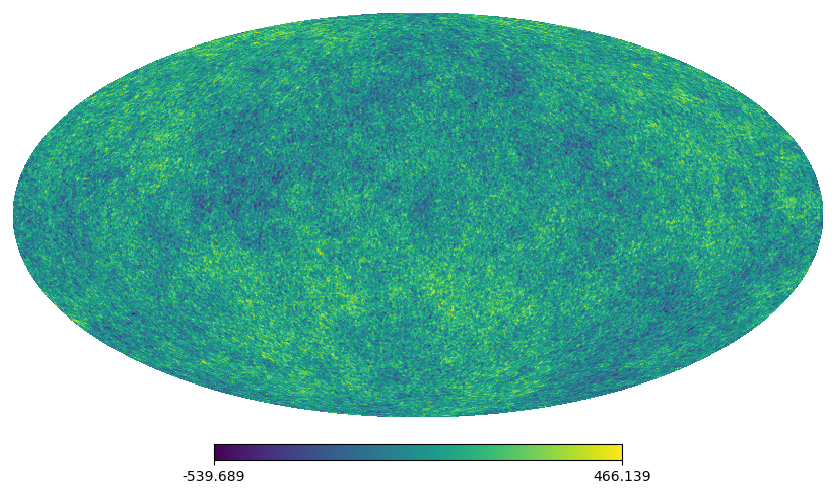

In [12]:
# Crear mapa con healpy
np.random.seed(42) #Establezco la semilla para el armado del mapa

nside = 64
NPIX = 12*nside

cmb_map = hp.synfast(cls, nside=NPIX, pol=True, new=True) #Genero el mapa

hp.mollview(cmb_map[0], title = '') #Visualizo el mapa

#### Ejercicio 3.b:

Guarde los $a_{\ell m}$ del mapa anterior, e intente crear un mapa a partir de estos $a_{\ell m}$, eligiendo los FWHM (ancho) del beam del instrumento hipotético con el que observamos el cielo.

Cual fue el FWHM de COBE, WMAP y Planck? (Elija alguna frecuencia típica para dar la respuesta, y pueden ser valores aproximados). Lo importante es distinguir de que orden de magnitud estamos hablando y comparar la resolución angular de las 3 misiones espaciales dedicadas a medir el CMB.

- COBE usó un FWHM de $7°$ en las frecuencias de $31.5$, $53$ y $90$ GHz.
- WMAP usó un FWHM de $0.82°$ para $23$ GHz, $0.60$ para $33$ GHz, $0.49°$ para $41$ GHz, $0.33°$ para $61$ GHz y $0.21°$ para $94$ GHz.
- Planck usó un FWHM de $0.55°$ para 30 GHz, $0.40°$ para $44$ GHz, $0.23°$ para $70$ GHz, $0.16°$ para $100$ GHz, $0.12°$ para $143$ GHz y $0.083°$ para $217$ GHz.

In [13]:
# Generar a_lm a partir del mapa (simulado o real)
a_lm = hp.map2alm(cmb_map[0])  # Guarda los coeficientes armónicos esféricos

# Guardar a_lm en un archivo .npy
np.save("a_lm.npy", a_lm)

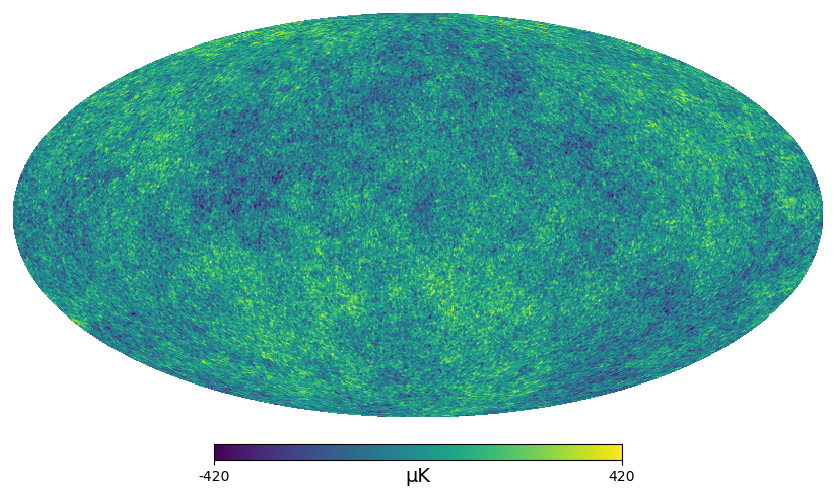

In [14]:
a_lm = np.load("a_lm.npy")

# Definir el FWHM del beam (en radianes)
fwhm_rad = np.radians(10.0 / 60.0)

# Reconstruir el mapa con beam smoothing
map_smoothed = hp.alm2map(a_lm, nside=256, fwhm=fwhm_rad)

# Visualizar
hp.mollview(map_smoothed, title = '', unit='μK',min=-420,max=420)
plt.show()


#### Ejercicio 4:

Vuelva a crear la misma realización de mapas de CMB, pero esta vez, con un beam distinto de cero, simulando el efecto de la PSF (point spread function) de un telescopio.

Repita con un FWHM más grande.



In [15]:
fwhm_deg_1 = 0.2  # Beam pequeño (ej. telescopio de alta resolución)
fwhm_rad_1 = np.radians(fwhm_deg_1)  # Convertir a radianes

cmb_smoothed_1 = hp.smoothing(map_in=cmb_map, fwhm=fwhm_rad_1, pol=True)

# Aplicar beam más grande (FWHM = 5 grados)
fwhm_deg_2 = 5  # Beam grande (ej. telescopio de baja resolución)
fwhm_rad_2 = np.radians(fwhm_deg_2)

cmb_smoothed_2 = hp.smoothing(map_in=cmb_map, fwhm=fwhm_rad_2, pol=True)

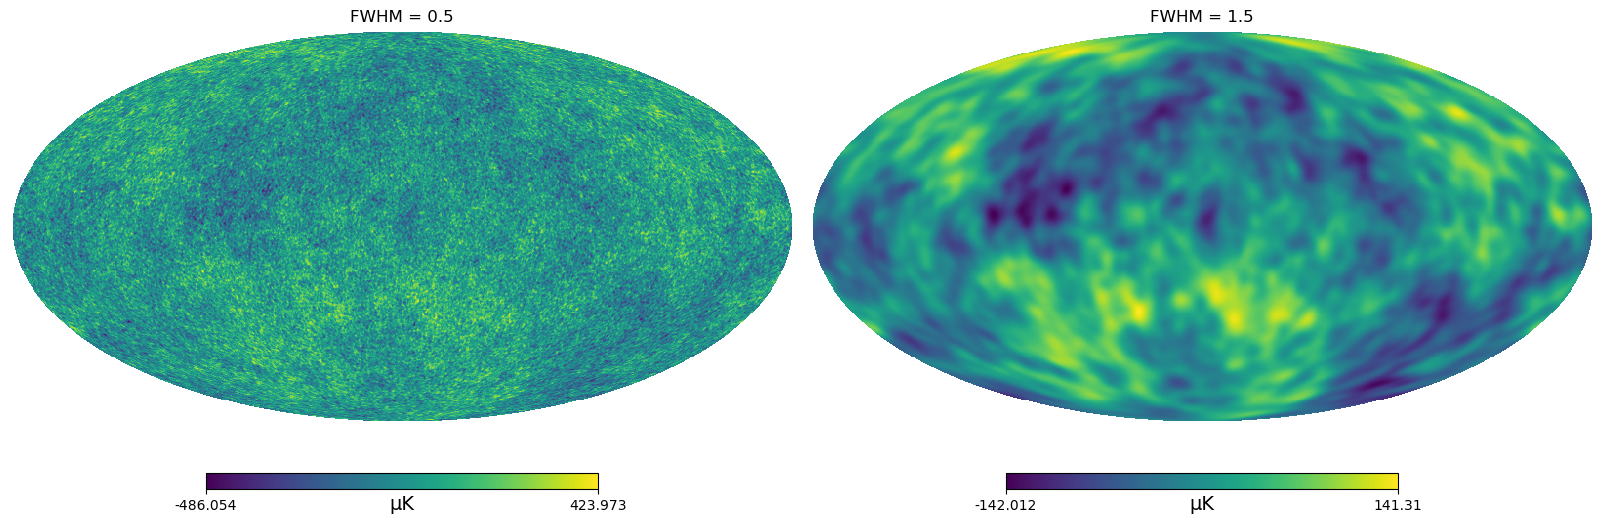

In [16]:
plt.figure(figsize = (16,10))
hp.mollview(cmb_smoothed_1[0], title=f"FWHM = 0.5", sub=(1, 2, 1), unit='μK')
hp.mollview(cmb_smoothed_2[0], title=f"FWHM = 1.5", sub=(1, 2, 2), unit='μK')
plt.show()

#### Ejercicio 5:

Calcular el espectro a partir del mapa, tanto en el caso de FWHM = 0, como en el caso distinto de cero. En este último caso, aplicar la corrección por beam.

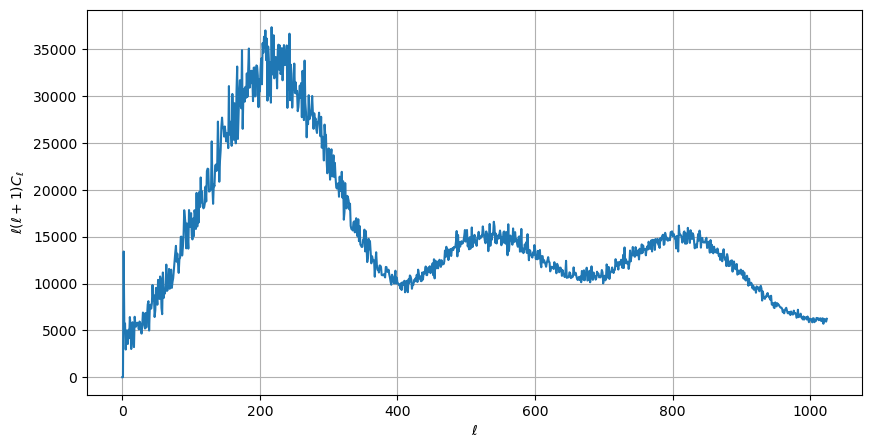

In [17]:
LMAX = 1024
cl = hp.anafast(cmb_map, lmax=LMAX) #Calculo los C_l a partir del mapa hasta l = LMAX
ell = np.arange(len(cl[0]))

plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl[0])
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()

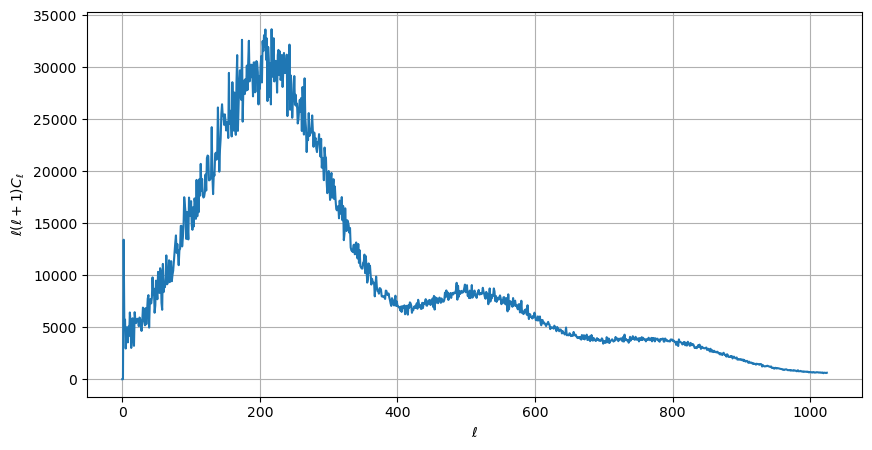

In [18]:
LMAX = 1024
cl = hp.anafast(cmb_smoothed_1, lmax=LMAX) #Calculo los C_l a partir del mapa hasta l = LMAX
ell = np.arange(len(cl[0]))

plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl[0])
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()

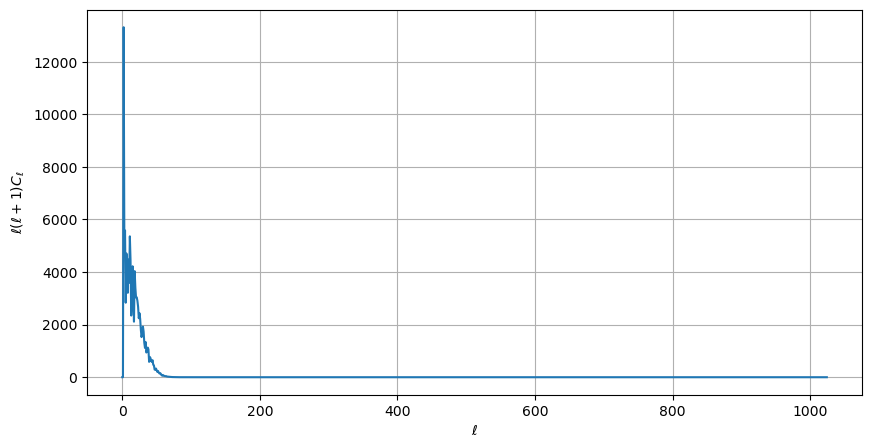

In [19]:
LMAX = 1024
cl = hp.anafast(cmb_smoothed_2, lmax=LMAX) #Calculo los C_l a partir del mapa hasta l = LMAX
ell = np.arange(len(cl[0]))

plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl[0])
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()

#### Ejercicio 6:

Explore los otros tutoriales de healpy para crear una máscara, eligiendo cierta región del cielo.

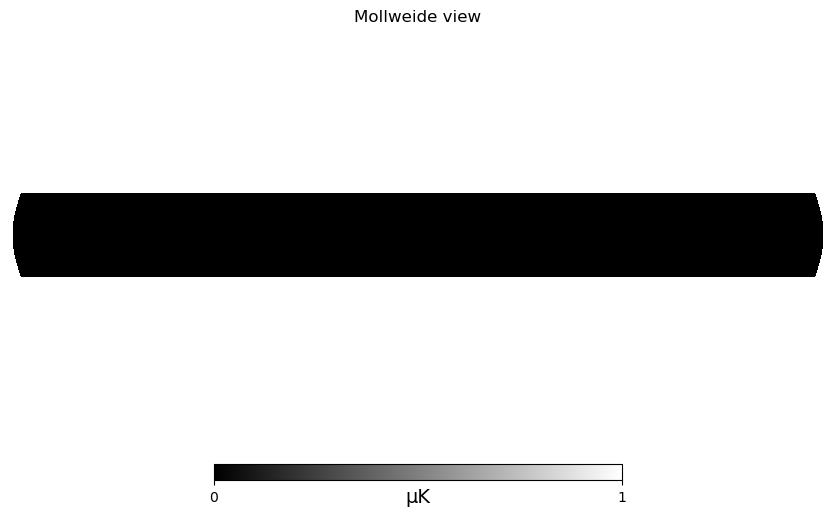

In [20]:
nside = 768 #Lo pongo para corregir las dimensiones de la máscara

npix = hp.nside2npix(nside)

theta, phi = hp.pix2ang(nside, np.arange(npix))
b_gal = np.degrees(np.pi/2 - theta)  # Latitud galáctica
mask = np.where(np.abs(b_gal) > 15, 1, 0)  # Excluir |b| < 15

hp.mollview(mask, unit='μK', cmap = 'gray') #Veo la máscara a aplicar

#### Ejercicio 7:

Aplique esa máscara al mapa de cielo del CMB que haya creado, y calcule el espectro de potencia. Describa las diferencias con el espectro de entrada. Cómo y en qué medida puede corregir el espectro con las herramientas vistas hasta ahora?

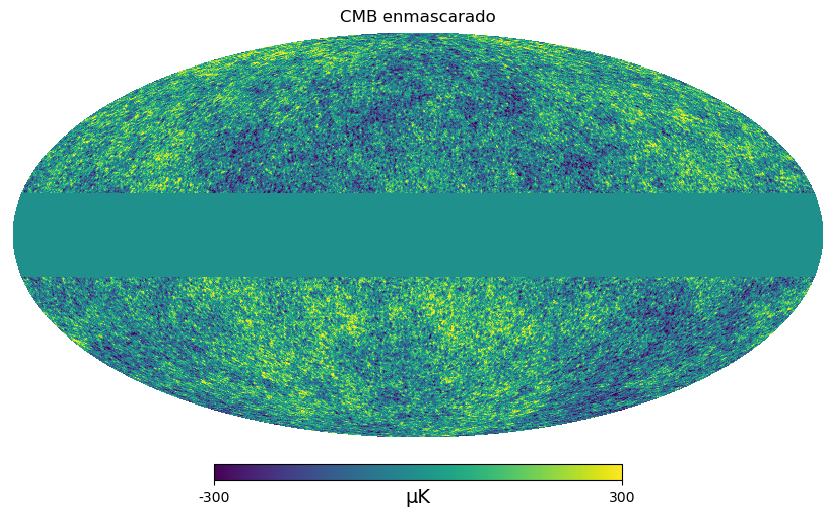

In [21]:
cmb_masked = cmb_map[0] * mask #Enmascaro el mapa

hp.mollview(cmb_masked, title="CMB enmascarado", unit="μK", min=-300, max=300)

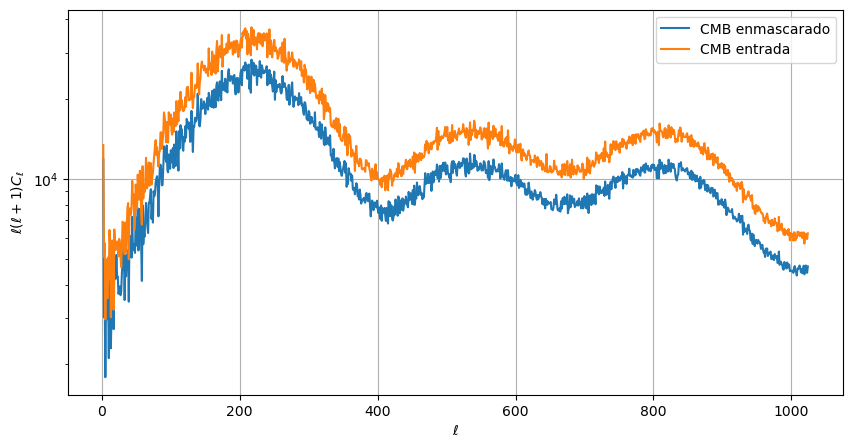

In [22]:
#Calculo el espectro de potencias
LMAX = 1024
cl_masked = hp.anafast(cmb_masked, lmax=LMAX)
cl = hp.anafast(cmb_map[0], lmax=LMAX)
ell = np.arange(2,len(cl))

plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl_masked[2:], label = "CMB enmascarado")
plt.plot(ell, ell * (ell + 1) * cl[2:], label = 'CMB entrada')
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid();